In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import string
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from textblob import TextBlob

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\CP2\tinder_reviews.csv")
df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3654c6a5-8f2a-4232-af36-04a5701b2b39,Richard Clavijo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Trash, especially with the new update. Great j...",1,0,14.24.3,2024-01-19 00:33:23,NaN,NaN,14.24.3
1,5cc81ca7-f9dc-4e6c-a649-ada4bf5e0b39,Chaotic Raisin,https://play-lh.googleusercontent.com/a-/ALV-U...,designed for the extraordinary and attractive....,3,1,14.24.3,2024-01-19 00:13:11,Sorry to hear you feel this way. Here to remin...,2024-01-19 00:52:54,14.24.3


In [3]:
df.rename(columns={'content': 'Reviews'}, inplace=True)

In [4]:
df.head(5)

,reviewId,userName,userImage,Reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3654c6a5-8f2a-4232-af36-04a5701b2b39,Richard Clavijo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Trash, especially with the new update. Great j...",1,0,14.24.3,2024-01-19 00:33:23,NaN,NaN,14.24.3
1,5cc81ca7-f9dc-4e6c-a649-ada4bf5e0b39,Chaotic Raisin,https://play-lh.googleusercontent.com/a-/ALV-U...,designed for the extraordinary and attractive....,3,1,14.24.3,2024-01-19 00:13:11,Sorry to hear you feel this way. Here to remin...,2024-01-19 00:52:54,14.24.3
2,7979aac6-25cc-4d70-802a-a97e708cc90e,Jesse Locke,https://play-lh.googleusercontent.com/a/ACg8oc...,Will not let me cancel my Vietnam account from...,1,0,14.23.0,2024-01-18 22:47:39,Sorry to hear about this! The instructions to ...,2024-01-18 23:41:10,14.23.0
3,3b369e21-1446-4421-bc92-d33319689ed2,Emily Abovyan,https://play-lh.googleusercontent.com/a/ACg8oc...,There's something seems not to be right in thi...,1,0,14.24.3,2024-01-18 22:44:38,Sorry to hear you’re having a negative experie...,2024-01-18 23:41:25,14.24.3
4,37180aff-0b1f-43dd-abf7-b28385151098,Rodgers Julius,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,14.24.3,2024-01-18 22:03:48,Thank you for your positive feedback! We're th...,2024-01-19 00:51:40,14.24.3


In [5]:

# Keep a random sample of 250 rows
df = df.sample(n=100000, random_state=42)  # Set a random seed for reproducibility

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the DataFrame after reducing the number of rows
print("\nDataFrame after reducing to a random sample of 100000 rows:")
print(df)


DataFrame after reducing to a random sample of 100000 rows:
                                   reviewId           userName  \
0      adb884a0-1778-4e1a-921e-02d02a833aca     Michael Pronto   
1      bf13919e-d7db-4b9f-ab21-5fda468738f5             Akshya   
2      45b1418a-e00e-4aba-8f1e-0abadd831a93      A Google user   
3      3a9de3ed-c65c-462c-9828-67fd6f70c944      A Google user   
4      ac56fd8d-4141-4b83-aeb7-92b73947c69a      A Google user   
...                                     ...                ...   
99995  b9f7fb16-7623-402c-bb2b-6b677bda7195      A Google user   
99996  72ba6433-c1fe-4f27-877d-610728907941      A Google user   
99997  e605084e-6be4-4374-9c3b-b52aa9213846      A Google user   
99998  3f56dfa3-6d82-4153-9205-ae0b83f9564c      A Google user   
99999  fd2d2d39-46a3-4f25-b5a7-e95f313e9a15  Rishabh Bhadoriya   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.goo

In [6]:
df=pd.DataFrame(df.Reviews)

df.head

<bound method NDFrame.head of                                                  Reviews
0      Terrible!!!! they keep stealing my money. I re...
1      One of the worst dating apps you could ever us...
2                                                    bad
3                                                   Easy
4      It is still filled with fake users, but I'm ug...
...                                                  ...
99995                                               Nice
99996  it is good for singles but everything is paid ...
99997                                              Sucks
99998         Charged for the secons month after 10 days
99999                               I have no experience

[100000 rows x 1 columns]>

In [7]:
df= df.dropna()

# data preprocessing and cleaning

In [8]:
df.shape

(99795, 1)

# Step 1 :- Lower case

In [9]:
df.text = df.Reviews.str.lower()

In [10]:
df.iloc[400,0]

'They banned me for no reason at all, but said I violated policy, but I never posted anything bad, what a sorry app, everyone they showed me was not even in my area.'

# Step 2 :- Punctuation

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [13]:
df.iloc[400,0]

'They banned me for no reason at all, but said I violated policy, but I never posted anything bad, what a sorry app, everyone they showed me was not even in my area.'

In [14]:
df['Reviews'] = df['Reviews'].apply(lambda x : remove_punctuation(x))

In [15]:
df.iloc[400,0]

'They banned me for no reason at all but said I violated policy but I never posted anything bad what a sorry app everyone they showed me was not even in my area'

# step 3 = Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [16]:
df['Reviews'] = df['Reviews'].str.replace(r'http\S+|www.\S+','',case=False)
df.iloc[400,0]

'They banned me for no reason at all but said I violated policy but I never posted anything bad what a sorry app everyone they showed me was not even in my area'

# step 4 =  Remove Number

 * \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [17]:
df['Reviews'] = df['Reviews'].str.replace('\d+','')

# step 5 = Removing Stop Words

In [18]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

# step 6 = common words
* manually created as per the case study

In [20]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Error loading words: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


{'adornment',
 'lionism',
 'anywheres',
 'interosculation',
 'phalangidean',
 'wireworker',
 'salve',
 'anaclastic',
 'ziega',
 'kamichi',
 'copperheadism',
 'theurgical',
 'spyhole',
 'excel',
 'archipallial',
 'Atlantides',
 'juramentado',
 'mulla',
 'loggat',
 'obligatum',
 'pheasantwood',
 'thestreen',
 'hypantrum',
 'pistillode',
 'physic',
 'reseed',
 'actionize',
 'Amazona',
 'porker',
 'analgize',
 'protosyntonose',
 'mehtar',
 'eclectist',
 'phonestheme',
 'purse',
 'conquian',
 'vitaminize',
 'episternalia',
 'ralline',
 'eelware',
 'Margarodinae',
 'pilliwinks',
 'polyanthus',
 'parishional',
 'foretypified',
 'posttracheal',
 'bookmark',
 'metalanguage',
 'Anisodactyla',
 'Anamite',
 'ilima',
 'panphobia',
 'cardioplegia',
 'gramophonically',
 'marvelousness',
 'cupolaman',
 'shogaol',
 'sipylite',
 'duplexity',
 'proctoplegia',
 'unendowing',
 'sheepkill',
 'interpoint',
 'unproficient',
 'glutinousness',
 'paralectotype',
 'Calonyction',
 'dermatograph',
 'sciaenoid',
 'S

In [21]:
df.head

<bound method NDFrame.head of                                                  Reviews
0      Terrible keep stealing money I removed credit ...
1      One worst dating apps could ever use They bann...
2                                                    bad
3                                                   Easy
4      It still filled fake users Im ugly women dont ...
...                                                  ...
99995                                               Nice
99996  good singles everything paid except messages n...
99997                                              Sucks
99998                          Charged secons month days
99999                                       I experience

[99795 rows x 1 columns]>

In [22]:
# Apply a second round of cleaning
def clean_Reviews_round2(Reviews):
    Reviews =  re.sub('failure|Crashes|ing|', '', Reviews) #remove delhipolice
    Reviews =  re.sub('worstapp|wrong|','', Reviews) #remove farmers
    Reviews =  re.sub(r"\b[a-zA-Z]\b", "", Reviews) ## 1 alphabet like a or s
    Reviews =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", Reviews)  ## 2 alphabet like ab or ad & aA
    Reviews =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(Reviews)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return Reviews

In [23]:
df['Reviews'] = df['Reviews'].apply(lambda x: clean_Reviews_round2(x))

# step 7 = Lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [25]:
def lemmatize_Reviews(Reviews):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(Reviews)]

In [26]:
df.text = df.text.apply(lambda x :' '.join(lemmatize_Reviews(x)))

# step 8 = Strip extra whitespace

In [27]:
df['Reviews'] = (df['Reviews'].astype("str").str.rstrip())

# step 9 = remove duplicate words

In [28]:
df = df.drop_duplicates('Reviews').reset_index(drop=True)

In [29]:
df.head()
df.shape

(65031, 1)

# data cleaning is done

# Term document metrix

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.Reviews)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

tdm = data_dtm.transpose()

tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)

tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 

# word cloud

In [31]:
Reviews = " ".join(review for review in df.Reviews)
print ("There are {} words in the combination of all review.".format(len(Reviews)))

There are 3591027 words in the combination of all review.


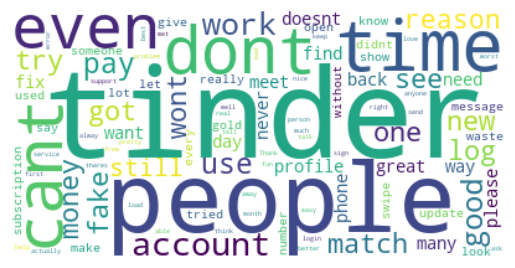

In [32]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(Reviews)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() 

# Sentiment analysis

In [33]:
df

,Reviews
0,Terrible keep steal money removed credit card ...
1,One worst could ever use They account reason s...
2,bad
3,Easy
4,still filled fake ugly dont want talk
...,...
65026,used connection feature never accurate worked ...
65027,BAN WITHOUT BASIS THEY PREFER HAVE STAY ACTIVE...
65028,Its good meet new people around
65029,good except nice


In [34]:
from textblob import TextBlob

df['polarity'] = df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1

df['Sentiment'] = np.where(df['polarity']>= 0, 'Positive', 'Negative')
df.head()

,Reviews,polarity,Sentiment
0,Terrible keep steal money removed credit card ...,-1.000000,Negative
1,One worst could ever use They account reason s...,-0.400000,Negative
2,bad,-0.700000,Negative
3,Easy,0.433333,Positive
4,still filled fake ugly dont want talk,-0.266667,Negative


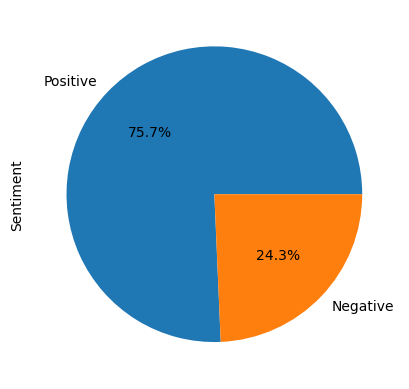

In [35]:
df.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

In [36]:
# Save data
df.to_csv(r"C:\Users\hp\Desktop\CP2\tinder_review_analysis.csv", index=False)